# Figure 2

In [1]:
source(here::here("code/init.R"))
library(ComplexHeatmap)

ℹ Parallelization enabled. Using 102 threads.

Loading required package: grid

ComplexHeatmap version 2.25.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




## Figure 2A

In [2]:
algo_stats <- fread(here("data/stats/algo_stats.csv"))
algo_stats

stage n_models r2       
1 0     21867    0.1628293
2 1      1640    0.2908161
3 2       728    0.3002845
4 3        30    0.3327613
5 4        30    0.3327613
6 5        13    0.3256238
7 6        13    0.3256238
8 7        13    0.3706605

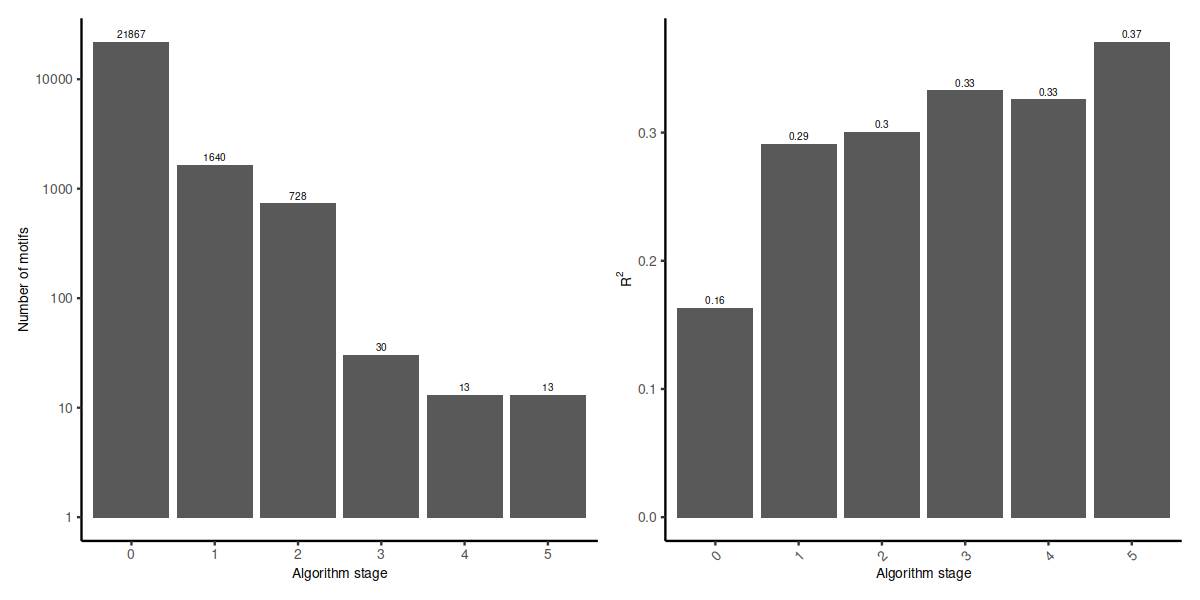

In [3]:
sps(10, 5)
algo_stats <- algo_stats %>%
    distinct(n_models, r2) %>%
    mutate(stage = 1:n() - 1)
p_n_models <- algo_stats %>%
    ggplot(aes(x = factor(stage), y = n_models, label = n_models)) +
    geom_col() +
    geom_text(vjust = -0.5, family = "ArialMT", size = 2) +
    scale_y_log10() +
    ylab("Number of motifs") +
    xlab("Algorithm stage")
p_r2 <- algo_stats %>%
    ggplot(aes(x = factor(stage), y = r2, label = round(r2, 2))) +
    geom_col() +
    geom_text(vjust = -0.5, family = "ArialMT", size = 2) +
    ylab(expression(R^2)) +
    xlab("Algorithm stage") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
p <- p_n_models + p_r2
p

## Figure 2B

In [4]:
model_list_gastru <- readr::read_rds(here("data/models/gastrulation_models_with_interactions.rds"))

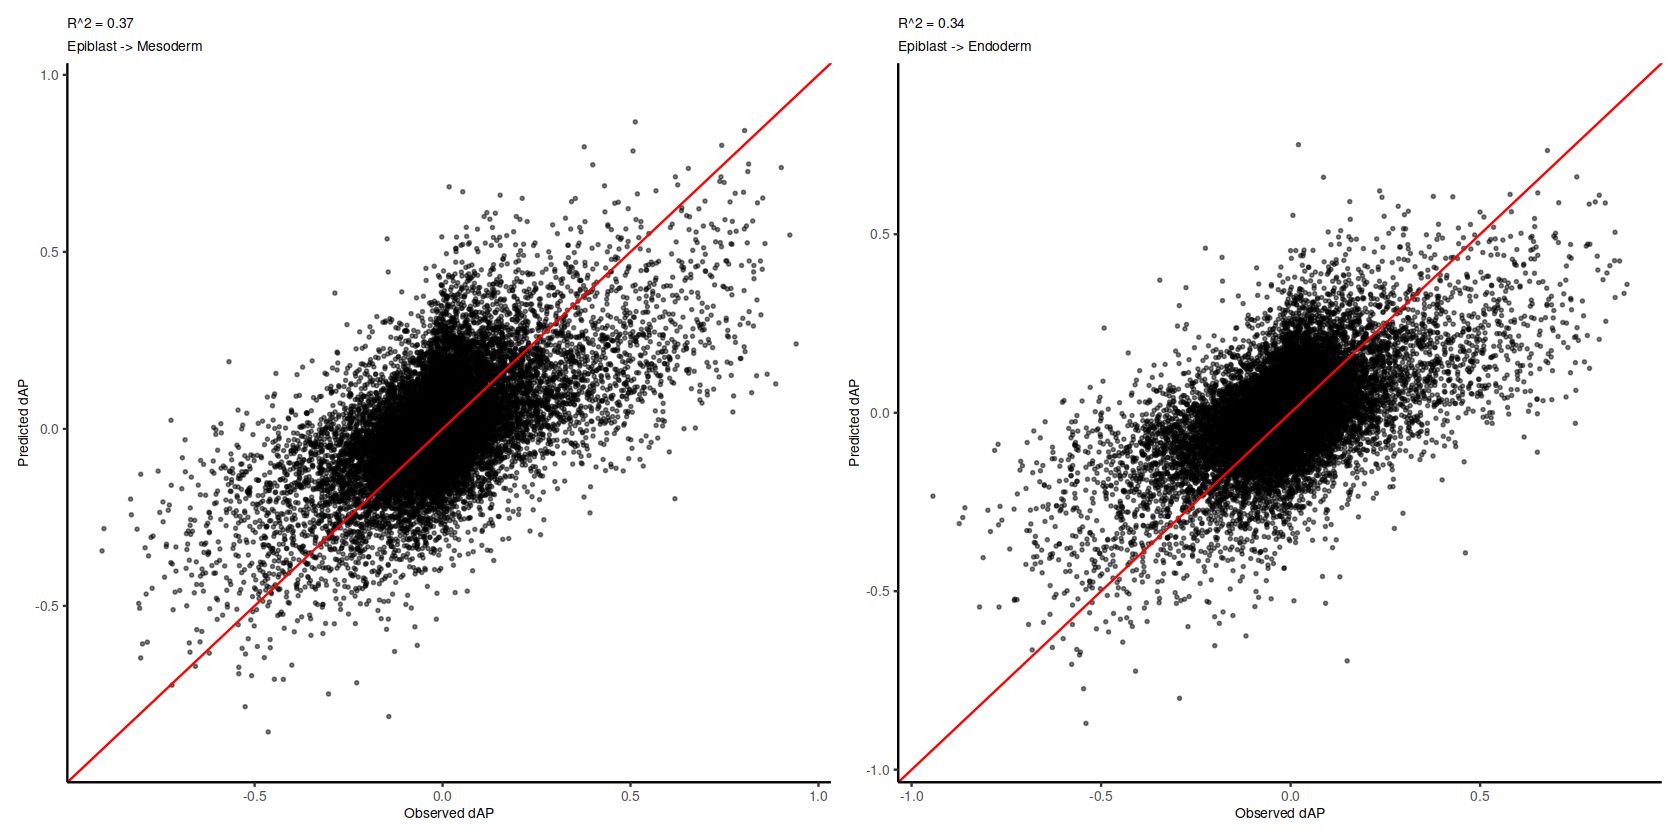

In [5]:
sps(14, 7)
p_meso <- plot_prediction_scatter(model_list_gastru$traj_model_meso, point_size = 0.5, alpha = 0.5) + xlab("Observed dAP") + ylab("Predicted dAP") + theme_arial_classic() + labs(subtitle = "Epiblast -> Mesoderm")
p_endo <- plot_prediction_scatter(model_list_gastru$traj_model_endo, point_size = 0.5, alpha = 0.5) + xlab("Observed dAP") + ylab("Predicted dAP") + theme_arial_classic() + labs(subtitle = "Epiblast -> Endoderm")
patchwork::wrap_plots(p_meso, p_endo, nrow = 1)

## Figure 2C

In [6]:
model_list_bm <- readr::read_rds(here("data/models/bm_models_with_interactions.rds"))

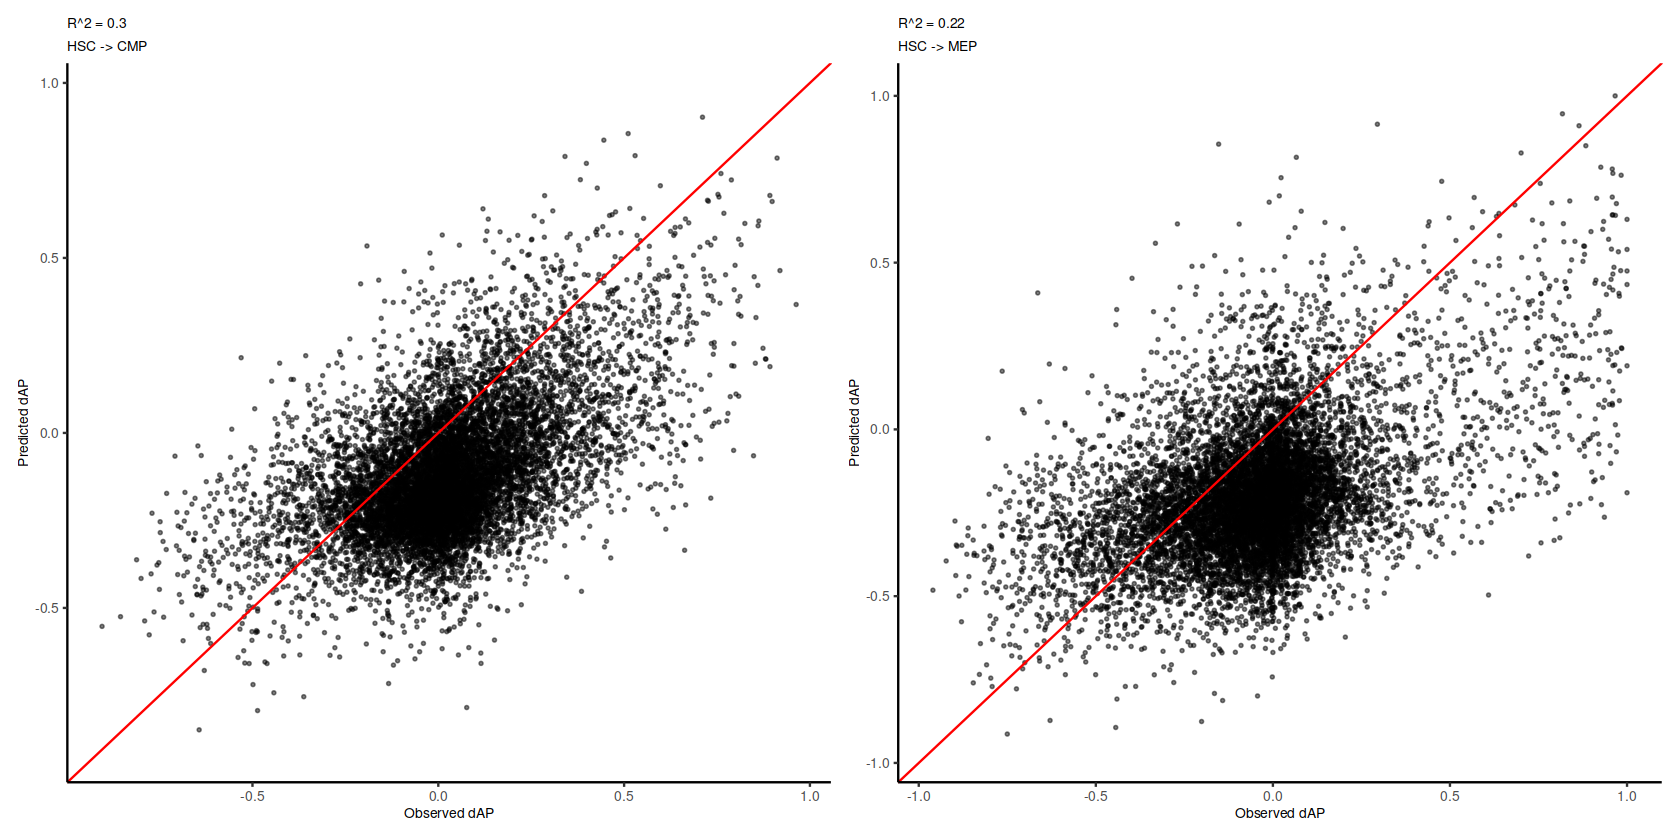

In [7]:
sps(14, 7)
p_cmp <- plot_prediction_scatter(model_list_bm$cmp, point_size = 0.5, alpha = 0.5) + xlab("Observed dAP") + ylab("Predicted dAP") + theme_arial_classic() + labs(subtitle = "HSC -> CMP")
p_mep <- plot_prediction_scatter(model_list_bm$mep, point_size = 0.5, alpha = 0.5) + xlab("Observed dAP") + ylab("Predicted dAP") + theme_arial_classic() + labs(subtitle = "HSC -> MEP")
patchwork::wrap_plots(p_cmp, p_mep, nrow = 1)

## Figure 2D

In [8]:
r2_gastru <- fread(here("data/stats/r2_gastrulation.csv"))
model_traj_map <- c(
    "meso" = "Epi->Meso",
    "endo" = "Epi->Endo",
    "cnp" = "Epi->Ecto",
    "exe" = "Meso->Exe",
    "caud" = "Meso->Caudal-Meso",
    "card" = "Meso->Cardio-Meso"
)
r2_gastru <- r2_gastru %>%
    mutate(traj = model_traj_map[model]) %>%
    mutate(traj = factor(traj, levels = model_traj_map))
    
r2_bm <- fread(here("data/stats/r2_bm.csv"))
model_traj_map_bm <- c(
    "cmp" = "HSC->CMP",
    "mep" = "CMP->MEP",
    "clp" = "CMP->CLP"
)
r2_bm <- r2_bm %>%
    mutate(traj = model_traj_map_bm[model]) %>%
    mutate(traj = factor(traj, levels = model_traj_map_bm))


In [9]:
sps(5, 5)
p <- r2_gastru %>%
    filter(type == "Iceqream (non-linear, interactions)") %>%
    select(traj, `ATAC-diff` = r2_test, `ATAC-signal` = r2_raw) %>%
    gather(key = "type", value = "r2", -traj) %>%
    ggplot(aes(x = traj, y = r2, fill = type)) +
    geom_col(position = "dodge") +
    scale_fill_manual(name = "", values = c(`ATAC-signal` = "brown", `ATAC-diff` = "darkgreen")) +
    theme(axis.text.x = ggplot2::element_text(angle = 45, hjust = 1)) +
    labs(x = "", y = expression(R^2))
p

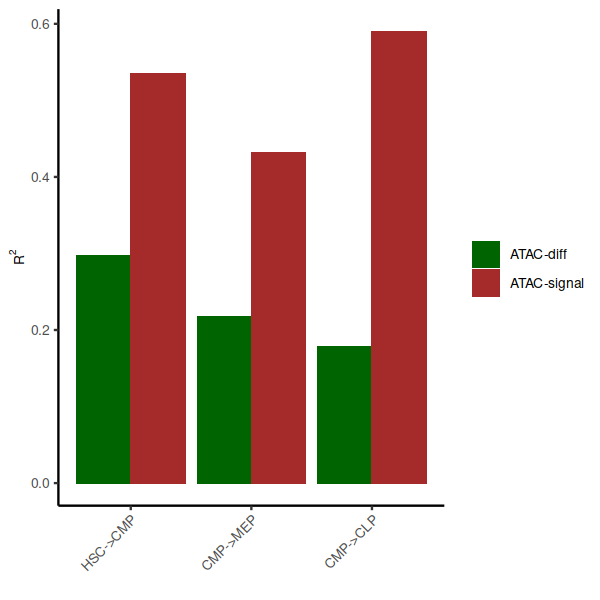

In [10]:
sps(5, 5)
p <- r2_bm %>%
    filter(type == "Iceqream (non-linear, interactions)") %>%
    select(traj, `ATAC-diff` = r2_test, `ATAC-signal` = r2_raw) %>%
    gather(key = "type", value = "r2", -traj) %>%
    ggplot(aes(x = traj, y = r2, fill = type)) +
    geom_col(position = "dodge") +
    scale_fill_manual(name = "", values = c(`ATAC-signal` = "brown", `ATAC-diff` = "darkgreen")) +
    theme(axis.text.x = ggplot2::element_text(angle = 45, hjust = 1)) +
    labs(x = "", y = expression(R^2))
p

## Figure 2E

In [11]:
sps(12, 7)

model_colors <- c(
    `DB motifs + linear` = "darkblue",
    `IQ - linear` = "#b1b104",
    `IQ - GAM functions` = "darkred",
    `IQ - no interactions` = "#ff7b00",
    `XGBoost-IQ` = "black",
    `IQ` = "darkgreen"
)

# Map old type names to new display names
type_rename_map <- c(
    "Literature" = "DB motifs + linear",
    "Iceqream (linear)" = "IQ - linear",
    "GAM" = "IQ - GAM functions",
    "Iceqream (non-linear)" = "IQ - no interactions",
    "XGBoost" = "XGBoost-IQ",
    "Iceqream (interactions)" = "IQ",
    "Iceqream (non-linear, interactions)" = "IQ" 
)

p <- r2_gastru %>%    
    select(traj, r2 = r2_test, type) %>%
    mutate(type = recode(type, !!!type_rename_map)) %>%
    mutate(type = factor(type, levels = names(model_colors))) %>%
    filter(!is.na(type)) %>%
    ggplot(aes(x = traj, y = r2, fill = type)) +
    geom_col(position = "dodge") +
    labs(x = "", y = "R^2") +
    scale_fill_manual(name = "", values = model_colors) +
    theme(axis.text.x = ggplot2::element_text(angle = 45, hjust = 1))
p

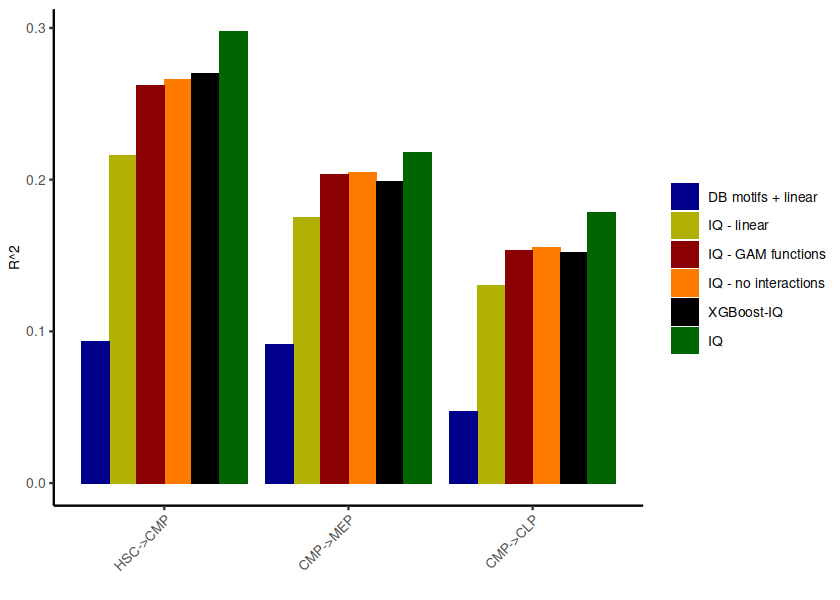

In [12]:
sps(7, 5)
p <- r2_bm %>%
    select(traj, r2 = r2_test, type) %>%
    mutate(type = recode(type, !!!type_rename_map)) %>%
    mutate(type = factor(type, levels = names(model_colors))) %>%
    filter(!is.na(type)) %>%
    ggplot(aes(x = traj, y = r2, fill = type)) +
    geom_col(position = "dodge") +
    labs(x = "", y = "R^2") +
    scale_fill_manual(name = "", values = model_colors) +
    theme(axis.text.x = ggplot2::element_text(angle = 45, hjust = 1))
p

## Figure S3A

In [13]:
motif_saturation <- fread(here("data/stats/db_motif_saturation.csv"))

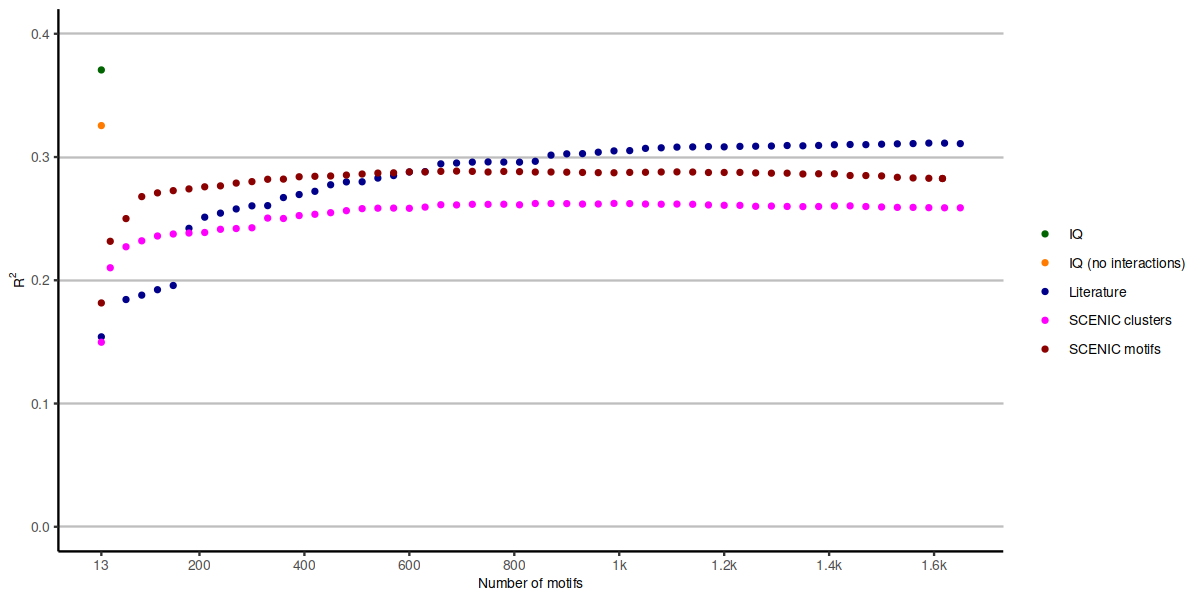

In [14]:
sps(10, 5)
color_key <- c("IQ" = "darkgreen", "IQ (no interactions)" = "#ff7b00", "Literature" = "darkblue", "SCENIC clusters" = "magenta", "SCENIC motifs" = "darkred")
p <- motif_saturation %>%
    ggplot(aes(x = n, y = r2_test, color = type)) +
    geom_hline(yintercept = c(0, 0.1, 0.2, 0.3, 0.4), color = "gray") +
    geom_point(size = 1) +
    xlab("Number of motifs") +
    ylab(expression(R^2)) +
    ylim(0, 0.4) +
    scale_color_manual(name = "", values = color_key) +
    scale_x_continuous(
        breaks = c(13, 200, 400, 600, 800, 1000, 1200, 1400, 1600),
        labels = c(13, 200, 400, 600, 800, "1k", "1.2k", "1.4k", "1.6k")
    ) +
    guides(name = "")
p

## Figure 2F

In [15]:
traj_model_meso <- rename_motif_models(model_list_gastru$traj_model_meso, c(
    SCENIC.jaspar__MA0807.1 = "Eomes/Tbox", SCENIC.cisbp__M07968 = "Gata",
    HOCOMOCO.SOX2_MOUSE.H11MO.0.A = "Nanog/Sox", SCENIC.elemento__CACCTGG = "Snai",
    SCENIC.homer__TAATTAGN_Lhx2 = "Lhx2/Emx", SCENIC.taipale_cyt_meth__MESP2_NAMCATATGKYN_eDBD = "Mesp2",
    SCENIC.jaspar__MA0867.2 = "Tcf", HOCOMOCO.SMAD2_HUMAN.H11MO.0.A = "Smad4",
    JASPAR.nub = "Pou3", SCENIC.predrem__nrMotif1975 = "Tbx1", JASPAR.Hnf1A = "Hnf1a",
    SCENIC.cisbp__M02420 = "Dmrta2", SCENIC.yetfasco__YGL096W_494 = "Meis"
))

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


ℹ Plotting 13 motifs



Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the ggseqlogo package.
  Please report the issue at <https://github.com/omarwagih/ggseqlogo/issues>.”
ℹ Plotting motif "Mesp2"

ℹ Plotting motif "Eomes/Tbox"

ℹ Plotting motif "Snai"

ℹ Plotting motif "Gata"

ℹ Plotting motif "Tcf"

ℹ Plotting motif "Nanog/Sox"

ℹ Plotting motif "Lhx2/Emx"

ℹ Plotting motif "Hnf1a"

ℹ Plotting motif "Pou3"

ℹ Plotting motif "Smad4"

ℹ Plotting motif "Dmrta2"

ℹ Plotting motif "Tbx1"

ℹ Plotting motif "Meis"

Warning message in ks.test.default(plot_df$observed[plot_df$energy == "0-3"], plot_df$observed[plot_df$energy == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(plot_df$observed[plot_df$energy == "0-3"], plot_df$observed[plot_df$energy == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(plot_df$observed[plot_d

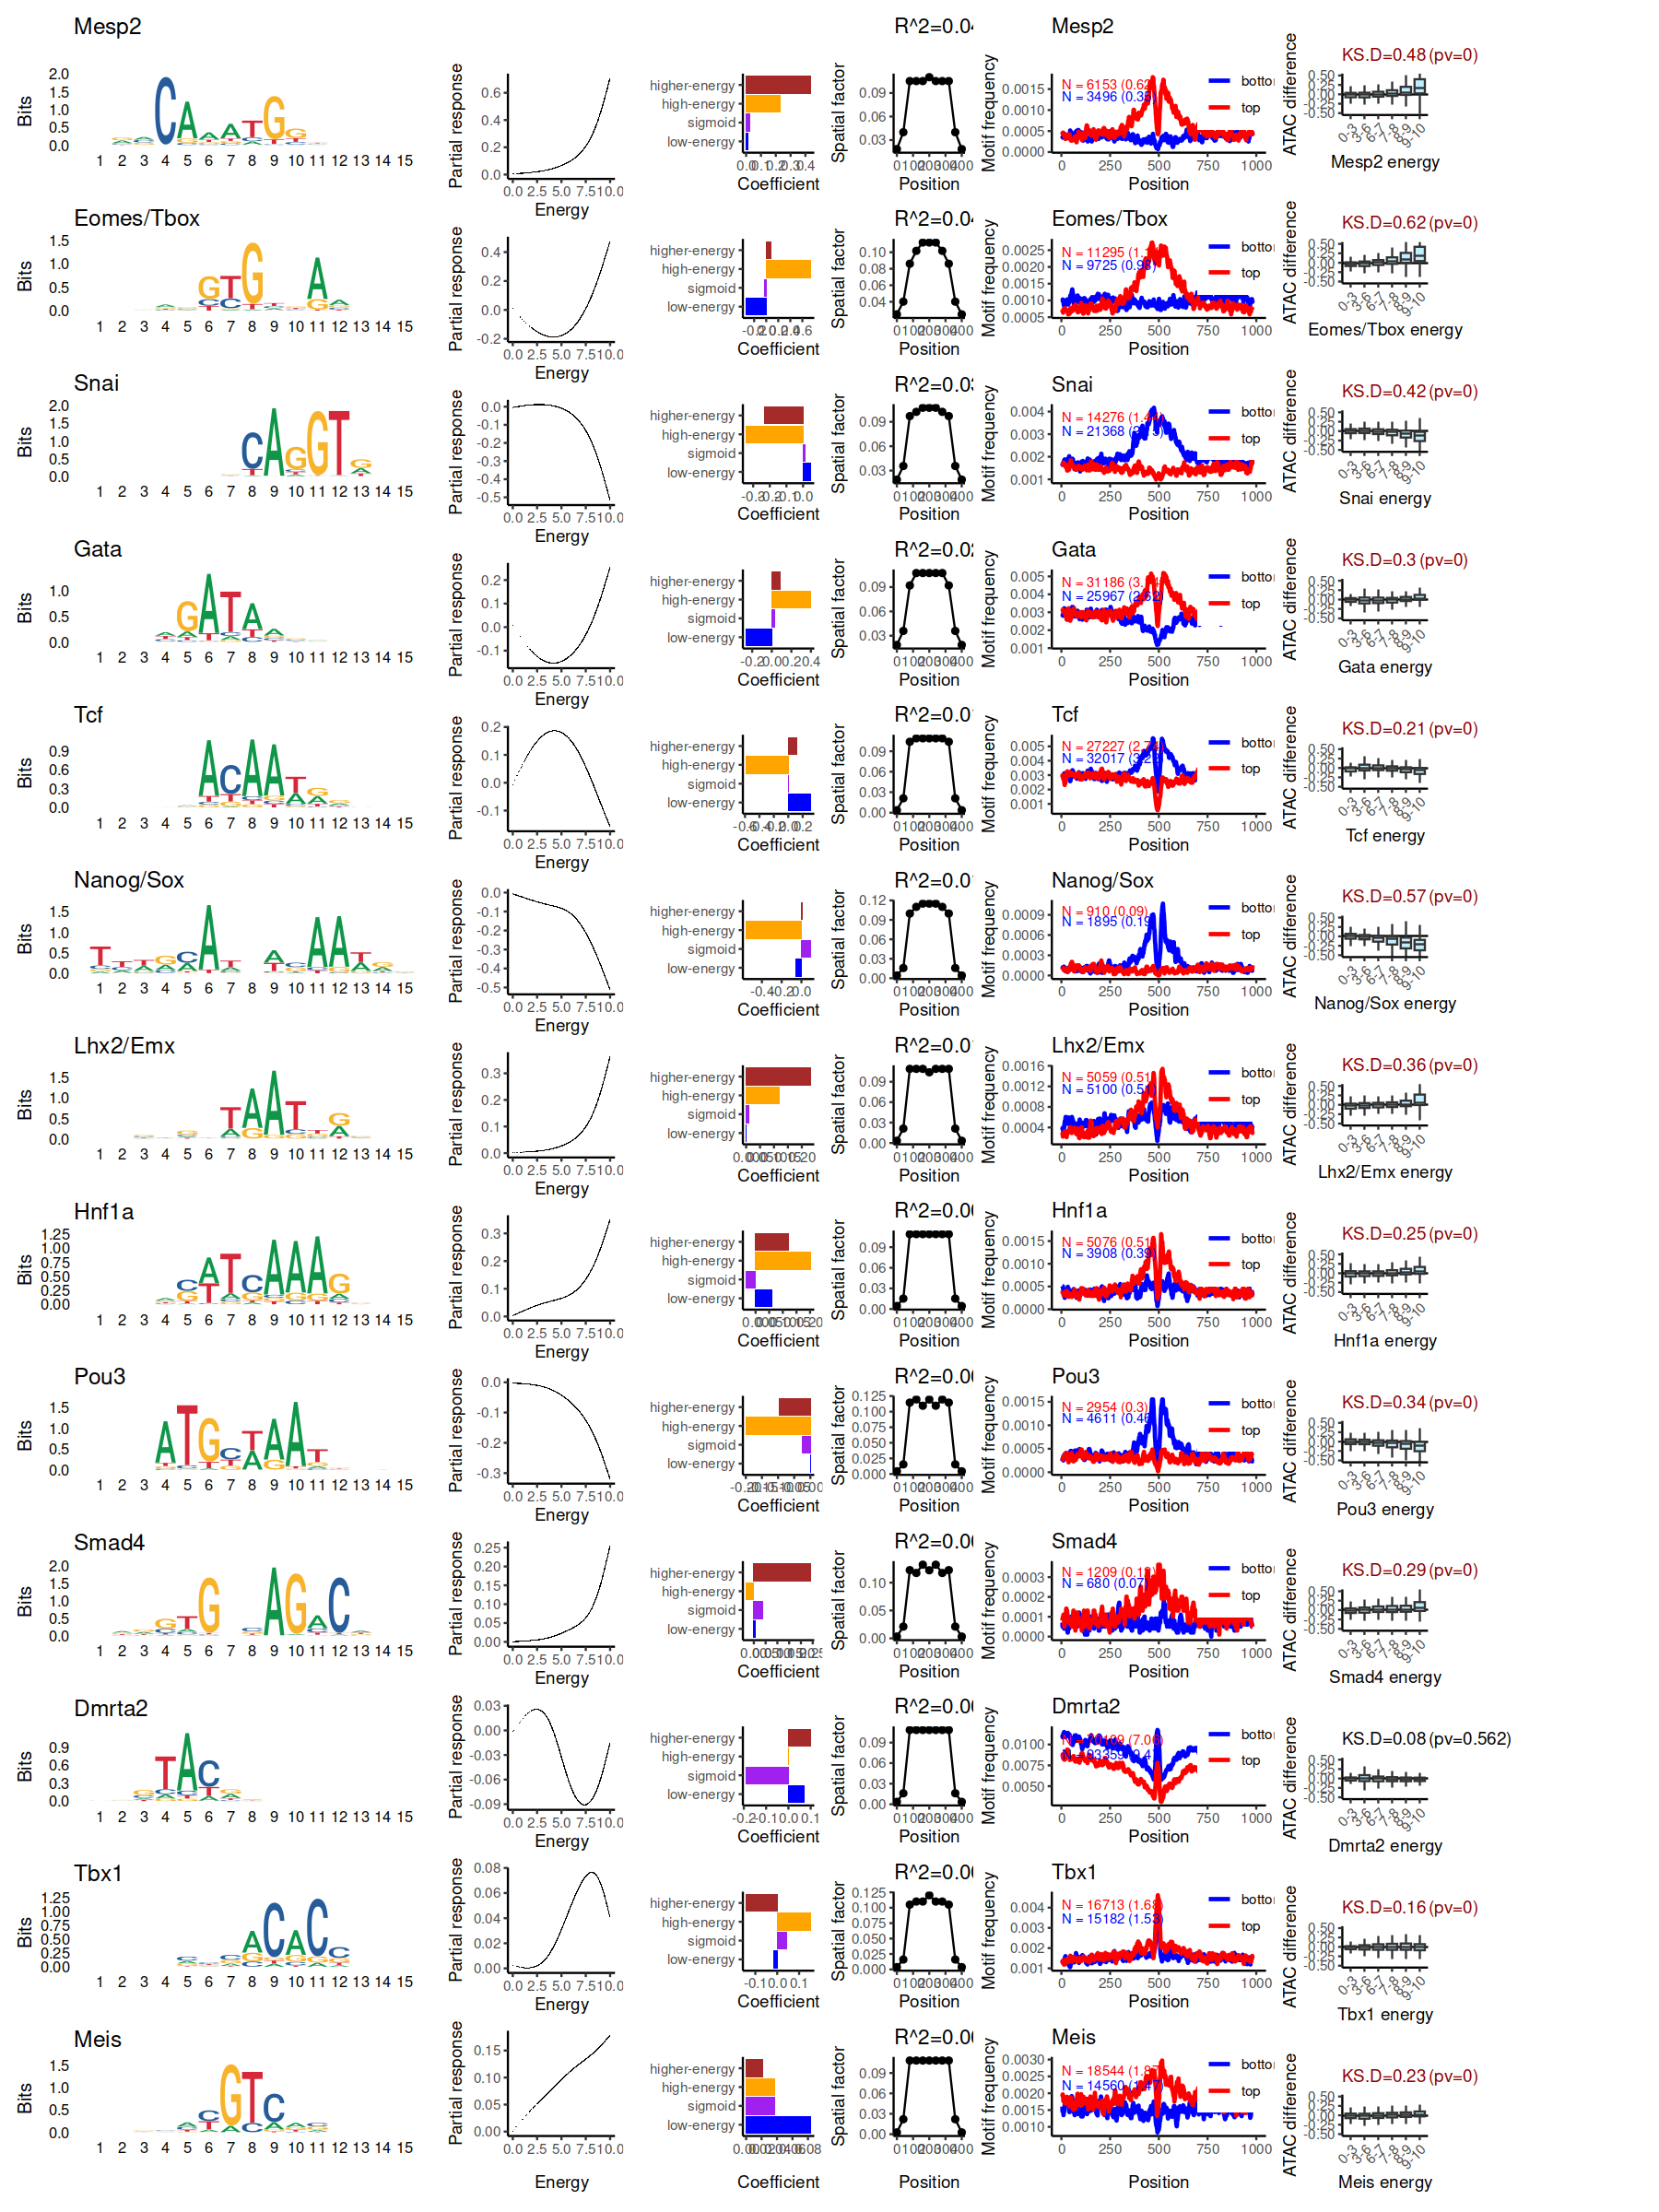

In [16]:
sps(15, 20)
plot_traj_model_report(traj_model_meso)

ℹ Plotting 10 motifs

ℹ Plotting motif "m1.HOCOMOCO.TAL1_HUMAN.H11MO.0.A"

ℹ Plotting motif "m1.SCENIC.predrem__nrMotif2500"

ℹ Plotting motif "m1.SCENIC.transfac_public__M00348"

ℹ Plotting motif "m1.SCENIC.homer__TGCTGAGTCA_Bach2"

ℹ Plotting motif "m2.JASPAR.FOXO1::FLI1"

ℹ Plotting motif "m3.SCENIC.taipale_tf_pairs__PBX4_HOXA1_NYNATMAATCA_CAP_repr"

ℹ Plotting motif "m3.HOCOMOCO.COE1_MOUSE.H11MO.0.A"

ℹ Plotting motif "m1.HOCOMOCO.ETV2_MOUSE.H11MO.0.A"

ℹ Plotting motif "m1.JASPAR.REST"

ℹ Plotting motif "m1.SCENIC.jaspar__MA1842.1"

Warning message in ks.test.default(plot_df$observed[plot_df$energy == "0-3"], plot_df$observed[plot_df$energy == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(plot_df$observed[plot_df$energy == "0-3"], plot_df$observed[plot_df$energy == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(plot_df$observed[plot_df$energy == "0-3"], plot_df$observed[plot_df$energy == :
“p-

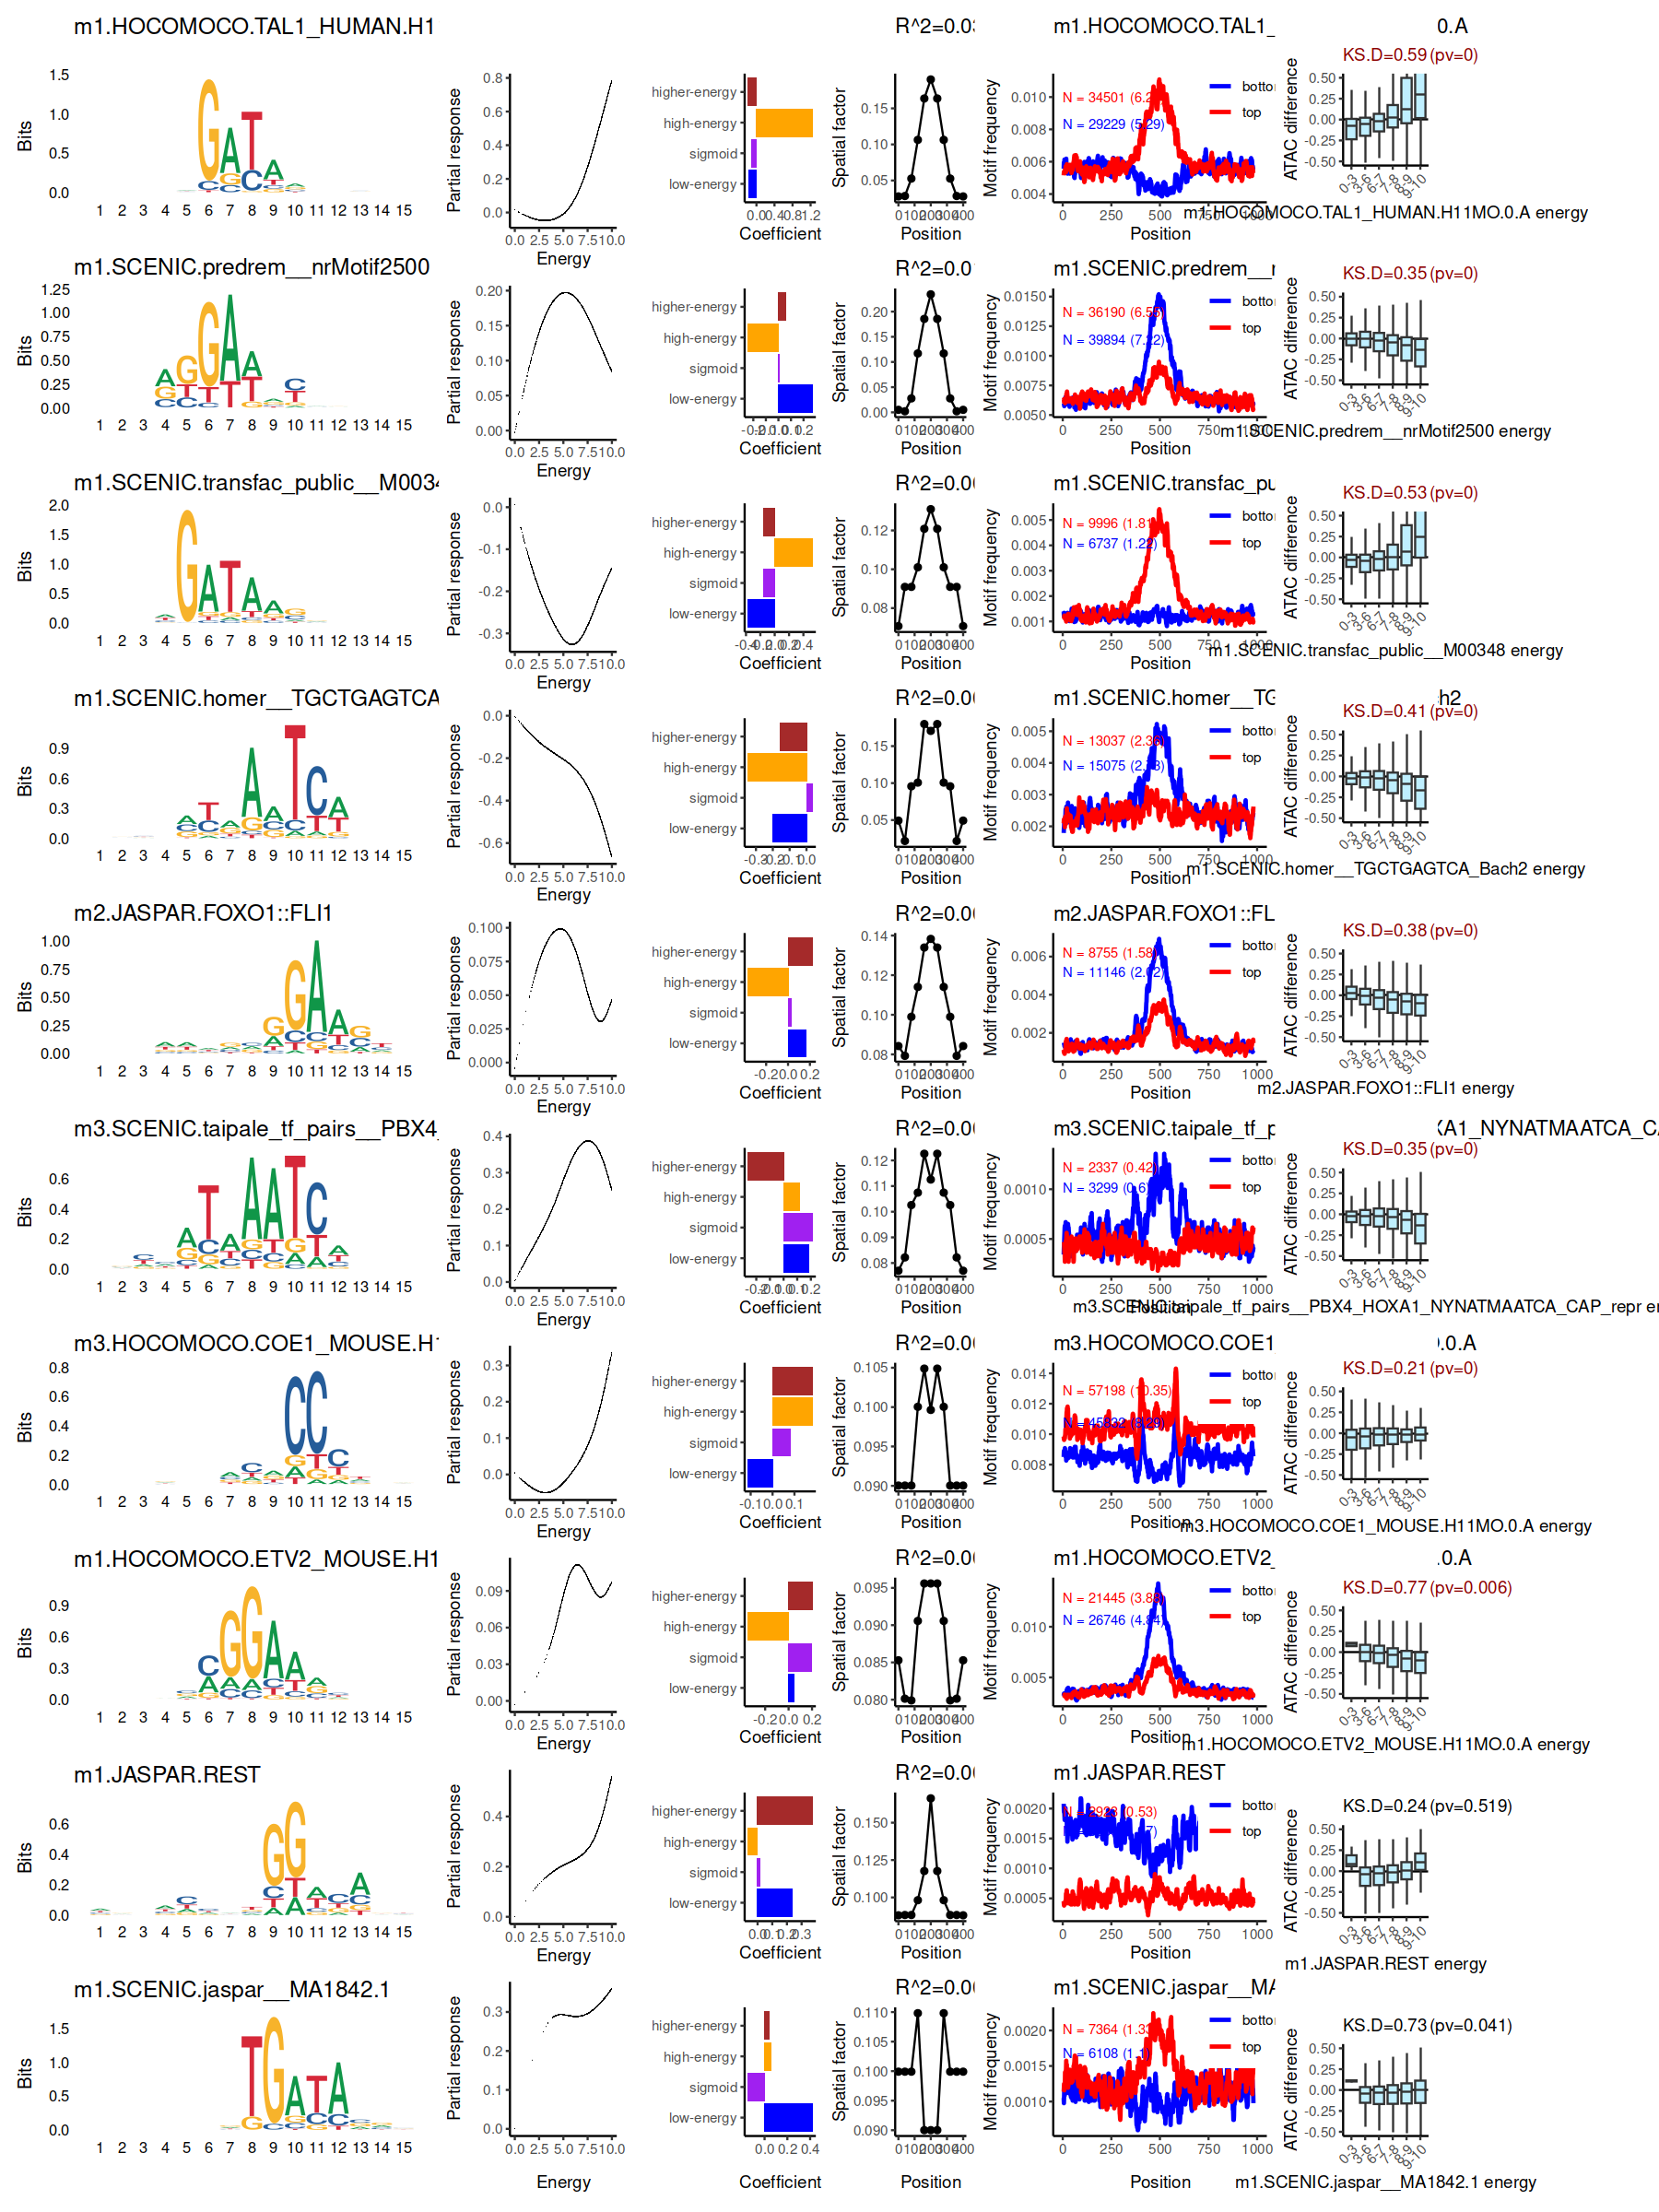

In [17]:
sps(15, 20)
gsetroot(here("data/hg38"))
plot_traj_model_report(model_list_bm$mep)
gsetroot(here("data/mm10"))

## Figure 2G

In [18]:
sps(10, 10)
# Define the motifs to display (positive vs negative)
pos_motifs <- c("Mesp2", "Eomes/Tbox", "Gata", "Lhx2/Emx", "Hnf1a", "Smad4", "Meis")
neg_motifs <- c("Snai", "Tcf", "Nanog/Sox", "Pou3", "Dmrta2", "Tbx1")

energy_mat <- traj_model_meso@normalized_energies # rows = peaks, columns = motifs
diff_score <- traj_model_meso@diff_score
names(diff_score) <- rownames(energy_mat)

mat_pos <- energy_mat[diff_score >= 0.2, c(pos_motifs, neg_motifs)]
mat_neg <- energy_mat[diff_score <= -0.2, c(pos_motifs, neg_motifs)]

order_by_correlation <- function(mat) {
    cm <- cor(t(mat), use = "pairwise.complete.obs")
    ord <- hclust(as.dist(1 - cm), method = "ward.D2")$order
    mat[ord, ]
}
mat_pos <- order_by_correlation(mat_pos)
mat_neg <- order_by_correlation(mat_neg)


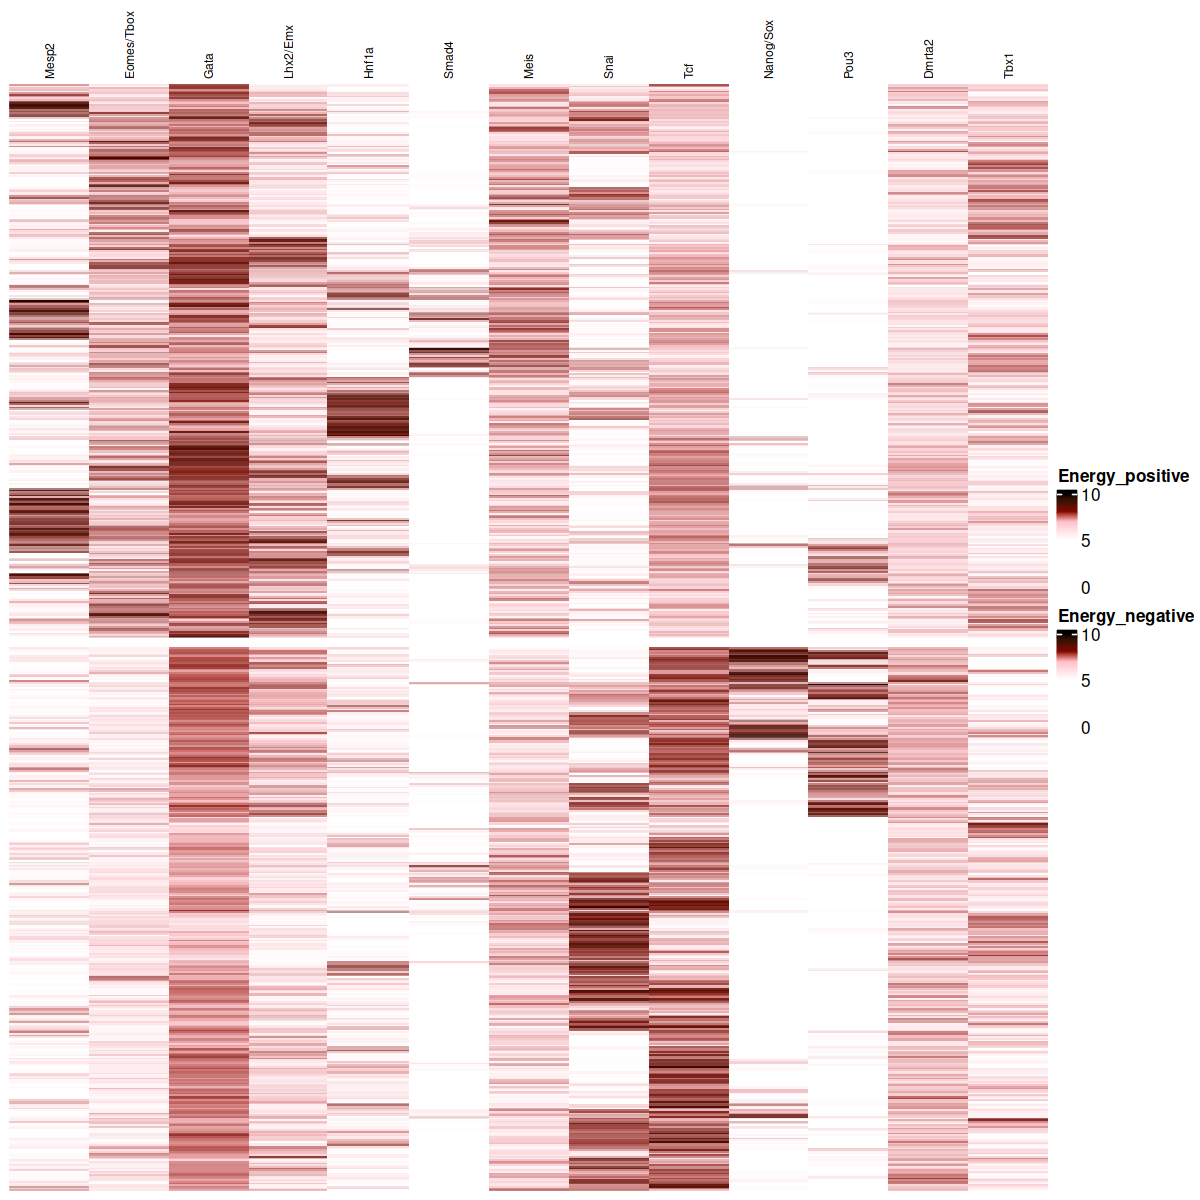

In [19]:
sps(10, 10)
col_fun <- circlize::colorRamp2(c(0, 5, 7, 8, 10), c("white", "white", "pink", "darkred", "black"))
hm_pos <- ComplexHeatmap::Heatmap(mat_pos, cluster_rows = FALSE, cluster_columns = FALSE, show_row_names = FALSE, show_column_names = TRUE, use_raster = TRUE, name = "Energy_positive", col = col_fun, column_names_side = "top", column_title_side = "top", row_title_side = "left", row_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5), column_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5), row_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5), column_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7))
hm_neg <- ComplexHeatmap::Heatmap(mat_neg, cluster_rows = FALSE, cluster_columns = FALSE, show_row_names = FALSE, show_column_names = FALSE, use_raster = TRUE, name = "Energy_negative", col = col_fun, column_names_side = "top", column_title_side = "top", row_title_side = "left", row_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5), column_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5), row_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5), column_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7))
combined_plot <- hm_pos %v% hm_neg
draw(combined_plot)

## Figure 2H

In [20]:
eflow_plot_rna_traj_hm_ch_lite <- function(mc_rna_flows_data, mc_rna_data, mc_metadata_data, traj_name, genes, use_atlas = TRUE, ct2col = NULL) {
    # Get trajectory orders for the specified trajectory
    traj_ords <- traj_orders[[traj_name]]

    # Extract expression data based on use_atlas parameter
    if (use_atlas) {
        # Use RNA flows data
        mc_rna_flows_legc <- log2(1e-5 + mc_rna_flows_data[[traj_name]][genes, , drop = FALSE])
    } else {
        # Use regular RNA data
        mc_rna_flows_legc <- log2(1e-5 + mc_rna_data[[traj_name]][genes, , drop = FALSE])
    }

    # Hierarchical clustering and reordering of genes
    hc_rows <- hclust(dist(mc_rna_flows_legc), method = "complete")

    # Reorder hc_rows by the mean of the expression of the genes
    d <- reorder(
        as.dendrogram(hc_rows),
        rowMeans(mc_rna_flows_legc),
        agglo.FUN = mean
    )
    ord <- as.hclust(d)$order
    mc_rna_flows_legc <- mc_rna_flows_legc[ord, ]

    # Create annotation data frame
    anot <- data.frame(
        "ct" = mc_metadata_data[[traj_name]][, "direct_projected_type"],
        row.names = rownames(mc_metadata_data[[traj_name]])
    )

    # Set up colors if not provided
    if (is.null(ct2col)) {
        ct2col <- unique(mc_metadata_data[[traj_name]][, "direct_projected_color"])
        names(ct2col) <- unique(mc_metadata_data[[traj_name]][, "direct_projected_type"])
    }

    # Define color palette for expression values
    colors <- colorRampPalette(c("white", "navyblue", "red", "black"))(50)

    # Set column names to match trajectory metacells
    colnames(mc_rna_flows_legc) <- colnames(mc_rna_flows_data[[traj_name]])

    # Create ComplexHeatmap annotation
    annot <- ComplexHeatmap::HeatmapAnnotation(
        cell_type = anot$ct,
        col = list(cell_type = ct2col)
    )

    # Create the heatmap
    hm <- ComplexHeatmap::Heatmap(
        mc_rna_flows_legc,
        cluster_rows = FALSE,
        cluster_columns = FALSE,
        col = colors,
        name = "Expression",
        show_column_names = FALSE,
        show_row_names = TRUE,
        top_annotation = annot,
        row_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7),
        column_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7),
        row_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7),
        column_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7),
        use_raster = TRUE
    )

    return(hm)
}

In [21]:
mc_rna_flows_data <- readRDS(here("data/flow/mc_rna_flows.rds"))
mc_rna_data <- readRDS(here("data/flow/mc_rna.rds"))
mc_metadata_data <- readRDS(here("data/flow/mc_metadata.rds"))
traj_orders <- readRDS(here("data/flow/traj_orders.rds"))
epiblast_genes <- c("Utf1", "Pou3f1", "Slc7a3", "L1td1", "Foxd3")
early_nascent_mesoderm_genes <- c("Mesp1", "Snai1", "Gas1", "Lefty2")

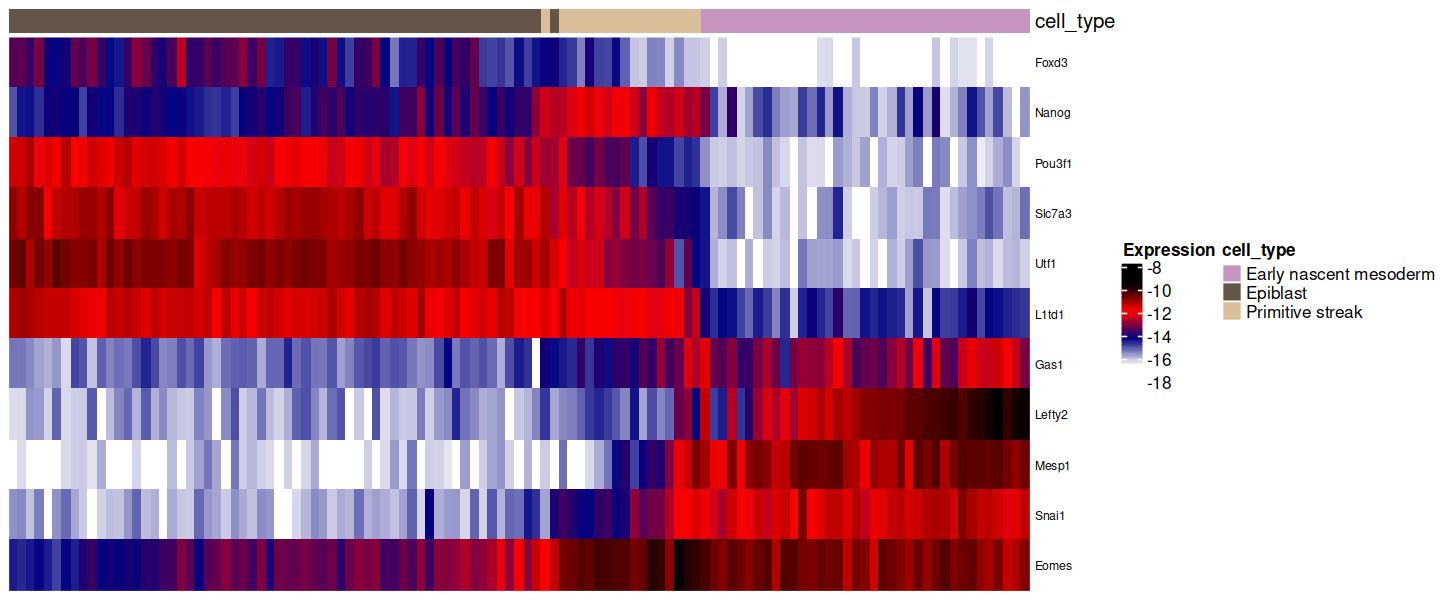

In [22]:
sps(12, 5)
hm <- eflow_plot_rna_traj_hm_ch_lite(
    mc_rna_flows_data = mc_rna_flows_data,
    mc_rna_data = mc_rna_data,
    mc_metadata_data = mc_metadata_data,
    traj_name = "meso",
    genes = c(epiblast_genes, early_nascent_mesoderm_genes, "Nanog", "Eomes")
)

ComplexHeatmap::draw(hm)

## Figure 2I

In [23]:
# Function to calculate KS test p-values
calculate_ks_test_pvalues <- function(df, motif_name) {
    # Get all peak types except Background
    peak_types <- levels(df$type)
    peak_types <- peak_types[peak_types != "Background"]

    # Get background data
    background_data <- df %>%
        filter(type == "Background") %>%
        pull(!!sym(motif_name))

    # Calculate KS test for each peak type vs background
    ks_results <- list()
    for (peak_type in peak_types) {
        peak_data <- df %>%
            filter(type == peak_type) %>%
            pull(!!sym(motif_name))

        ks_test <- ks.test(peak_data, background_data)
        ks_results[[peak_type]] <- list(
            p_value = ks_test$p.value,
            statistic = ks_test$statistic,
            method = ks_test$method
        )
    }

    return(ks_results)
}

# Function to print KS test p-values
print_ks_test_pvalues <- function(df, motif_name) {
    ks_results <- calculate_ks_test_pvalues(df, motif_name)

    cat("KS Test Results for", motif_name, "vs Background:\n")
    cat("=", strrep("=", 50), "\n")

    for (peak_type in names(ks_results)) {
        result <- ks_results[[peak_type]]
        cat(sprintf(
            "%-20s: p-value = %.2e, D = %.4f\n",
            peak_type, result$p_value, result$statistic
        ))
    }

    return(ks_results)
}

# Function to extract motif energy data from multiple peak sets and random regions
extract_multiple_motif_energy_data <- function(motif_models, peak_list, peak_names, motif_name = "Eomes/Tbox", random_size = NULL, mdb = NULL) {
    if (is.null(mdb)) {
        mdb <- iceqream:::motifs_to_mdb(motif_models)
    }
    if (is.null(random_size)) {
        random_size <- max(sapply(peak_list, nrow))
    }

    # Extract random background
    random_e <- prego::gextract_pwm(grandom_genome(500, random_size), dataset = mdb)
    random_df <- random_e %>%
        mutate(type = "Background") %>%
        filter(!is.na(!!sym(motif_name)))

    # Extract data for each peak set
    peak_dfs <- list()
    for (i in seq_along(peak_list)) {
        motif_e <- prego::gextract_pwm(gintervals.normalize(peak_list[[i]], 500), dataset = mdb)
        peak_dfs[[i]] <- motif_e %>%
            mutate(type = peak_names[i]) %>%
            filter(!is.na(!!sym(motif_name)))
    }

    # Combine all data
    df <- bind_rows(c(list(random_df), peak_dfs)) %>%
        mutate(type = factor(type, levels = c("Background", peak_names)))

    return(df)
}

# Function to plot multiple motif energy comparisons
plot_multiple_motif_energy_comparison <- function(df, motif_name, add_signif = TRUE, add_sina = TRUE, ylim = NULL) {
    # Get all peak types except Background
    peak_types <- levels(df$type)
    peak_types <- peak_types[peak_types != "Background"]

    # Create color palette with darkgray for Background and different colors for peak types
    n_colors <- length(peak_types)
    peak_colors <- RColorBrewer::brewer.pal(max(3, n_colors), "Set1")[1:n_colors]
    color_values <- c("Background" = "darkgray")
    names(peak_colors) <- peak_types
    color_values <- c(color_values, peak_colors)

    p <- df %>%
        ggplot(aes(x = type, y = !!sym(motif_name), fill = type)) +
        geom_boxplot(outliers = FALSE, fatten = 0.5, linewidth = 0.5)

    if (add_sina) {
        p <- p +
            ggforce::geom_sina(size = 0.01, alpha = 0.005)
        # geom_boxplot(width = 0.5, outlier.size = 0.5, fatten = 0.5) +
    }
    p <- p +
        scale_fill_manual(values = color_values) +
        theme(legend.position = "right") +
        xlab("")

    if (add_signif && length(peak_types) > 0) {
        # Create comparisons list for significance testing
        comparisons <- lapply(peak_types, function(pt) c(pt, "Background"))

        p <- p +
            ggsignif::geom_signif(
                test = "ks.test",
                map_signif_level = TRUE,
                comparisons = comparisons,
                step_increase = 0.1
            )
    }

    if (!is.null(ylim)) {
        p <- p +
            coord_cartesian(ylim = ylim)
    }

    p <- p +
        ylab(paste0(motif_name, " energy")) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 0.5))

    return(p)
}

compare_multiple_motif_energy <- function(motif_models, peak_list, peak_names, motif_name = "Eomes/Tbox", random_size = 5e3) {
    df <- extract_multiple_motif_energy_data(motif_models, peak_list, peak_names, motif_name, random_size)
    p <- plot_multiple_motif_energy_comparison(df, motif_name)
    
    # Print KS test p-values
    ks_results <- print_ks_test_pvalues(df, motif_name)

    return(list(plot = p, data = df, ks_results = ks_results))
}

In [24]:
nanog_peaks <- gintervals.load("Encode.Nanog_ENCFF438EEG_peaks")
mesp_peaks <- gintervals.load("Lin_2022_Nat_Cell_Biol.Mesp1_24h_dox")
eomes_peaks <- gintervals.load("Schule_2023_Dev_Cell.eomes_peaks")

In [25]:
eomes_multi <- extract_multiple_motif_energy_data(traj_model_meso@motif_models, list(eomes_peaks, mesp_peaks, nanog_peaks), c("Eomes", "Mesp2", "Nanog"), motif_name = "Eomes/Tbox", random_size = 5e3)
mesp_multi <- extract_multiple_motif_energy_data(traj_model_meso@motif_models, list(eomes_peaks, mesp_peaks, nanog_peaks), c("Eomes", "Mesp2", "Nanog"), motif_name = "Mesp2", random_size = 5e3)
nanog_multi <- extract_multiple_motif_energy_data(traj_model_meso@motif_models, list(eomes_peaks, mesp_peaks, nanog_peaks), c("Eomes", "Mesp2", "Nanog"), motif_name = "Nanog/Sox", random_size = 5e3)

Warning message in ks.test.default(c(-15.9668708660943, -16.007997334493, -16.8038656767941, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(c(-16.5728317945024, -16.5063154851327, -16.9344742771746, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(c(-16.93615314528, -16.8089962131818, -17.0304415416734, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(c(-15.3437354900162, -16.8601891385119, -17.1783981865047, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(c(-14.6886773863998, -14.3650862857998, -15.9165971241603, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(c(-18.0332515473978, -14.4220728042869, -17.4364656854936, :
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(c(-14.7186105920821, -15.6369856543012, -20.6609850135426, :
“p-valu

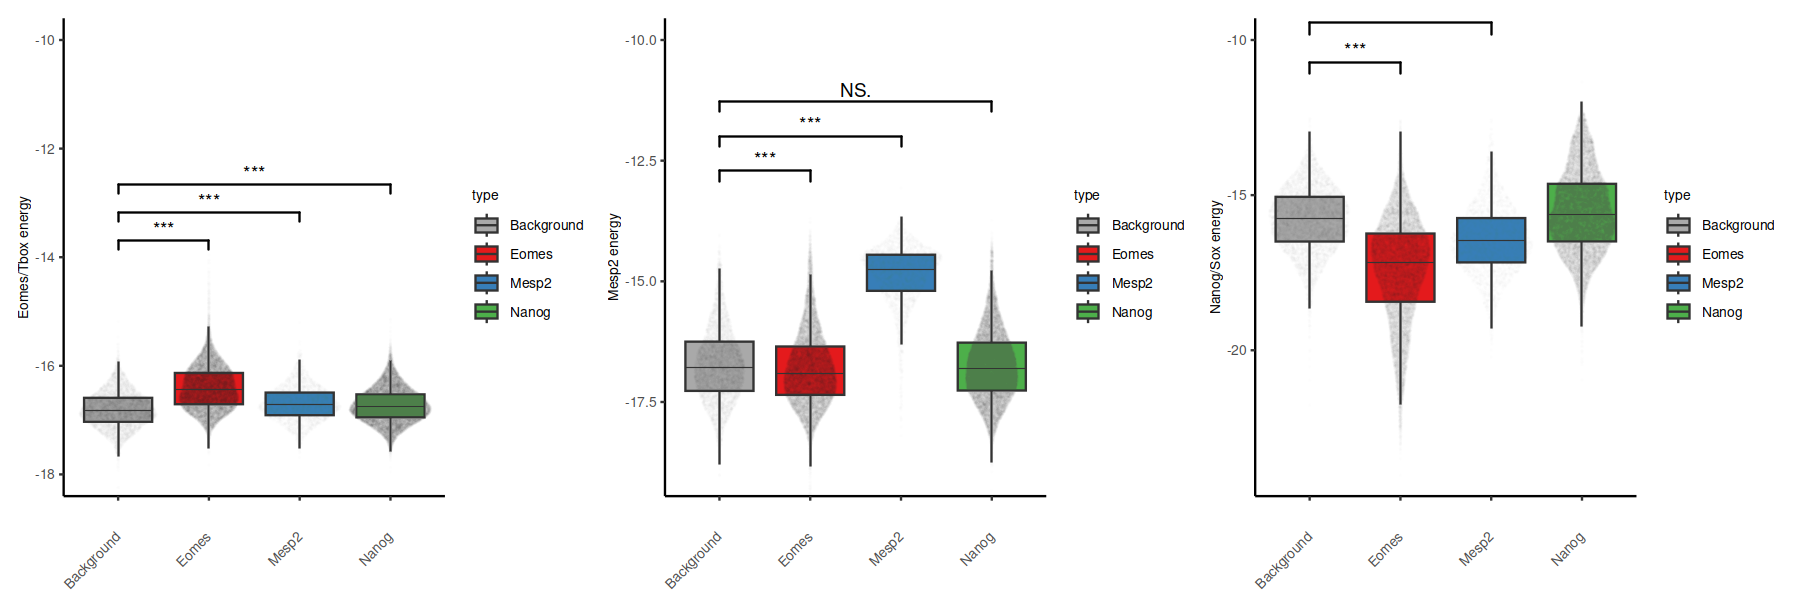

In [26]:
sps(15, 5)
eomes_multi_plot <- plot_multiple_motif_energy_comparison(eomes_multi, "Eomes/Tbox", ylim = c(-18, -10), add_sina = TRUE)
mesp_multi_plot <- plot_multiple_motif_energy_comparison(mesp_multi, "Mesp2", ylim = c(-19, -10), add_sina = TRUE)
nanog_multi_plot <- plot_multiple_motif_energy_comparison(nanog_multi, "Nanog/Sox", ylim = c(-24, -10), add_sina = TRUE)
eomes_multi_plot + mesp_multi_plot + nanog_multi_plot

In [27]:
# Print KS test p-values for the motif energy comparisons
cat("\n=== KS Test P-values for Motif Energy Comparisons ===\n")
print_ks_test_pvalues(eomes_multi, "Eomes/Tbox")
print_ks_test_pvalues(mesp_multi, "Mesp2")
print_ks_test_pvalues(nanog_multi, "Nanog/Sox")


=== KS Test P-values for Motif Energy Comparisons ===


Warning message in ks.test.default(peak_data, background_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(peak_data, background_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(peak_data, background_data):
“p-value will be approximate in the presence of ties”


KS Test Results for Eomes/Tbox vs Background:
= ================================================== 
Eomes               : p-value = 0.00e+00, D = 0.3937
Mesp2               : p-value = 4.04e-33, D = 0.1584
Nanog               : p-value = 6.71e-36, D = 0.1008


$Eomes
$Eomes$p_value
[1] 0

$Eomes$statistic
        D 
0.3937497 

$Eomes$method
[1] "Asymptotic two-sample Kolmogorov-Smirnov test"


$Mesp2
$Mesp2$p_value
[1] 4.035232e-33

$Mesp2$statistic
        D 
0.1584362 

$Mesp2$method
[1] "Asymptotic two-sample Kolmogorov-Smirnov test"


$Nanog
$Nanog$p_value
[1] 6.710534e-36

$Nanog$statistic
        D 
0.1007872 

$Nanog$method
[1] "Asymptotic two-sample Kolmogorov-Smirnov test"

Warning message in ks.test.default(peak_data, background_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(peak_data, background_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(peak_data, background_data):
“p-value will be approximate in the presence of ties”


KS Test Results for Mesp2 vs Background:
= ================================================== 
Eomes               : p-value = 1.39e-13, D = 0.0621
Mesp2               : p-value = 0.00e+00, D = 0.7956
Nanog               : p-value = 2.13e-01, D = 0.0167


$Eomes
$Eomes$p_value
[1] 1.39225e-13

$Eomes$statistic
         D 
0.06205392 

$Eomes$method
[1] "Asymptotic two-sample Kolmogorov-Smirnov test"


$Mesp2
$Mesp2$p_value
[1] 0

$Mesp2$statistic
        D 
0.7955792 

$Mesp2$method
[1] "Asymptotic two-sample Kolmogorov-Smirnov test"


$Nanog
$Nanog$p_value
[1] 0.2125085

$Nanog$statistic
         D 
0.01669022 

$Nanog$method
[1] "Asymptotic two-sample Kolmogorov-Smirnov test"

Warning message in ks.test.default(peak_data, background_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(peak_data, background_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(peak_data, background_data):
“p-value will be approximate in the presence of ties”


KS Test Results for Nanog/Sox vs Background:
= ================================================== 
Eomes               : p-value = 0.00e+00, D = 0.4365
Mesp2               : p-value = 3.66e-88, D = 0.2595
Nanog               : p-value = 1.96e-53, D = 0.1232


$Eomes
$Eomes$p_value
[1] 0

$Eomes$statistic
        D 
0.4364992 

$Eomes$method
[1] "Asymptotic two-sample Kolmogorov-Smirnov test"


$Mesp2
$Mesp2$p_value
[1] 3.659623e-88

$Mesp2$statistic
        D 
0.2595247 

$Mesp2$method
[1] "Asymptotic two-sample Kolmogorov-Smirnov test"


$Nanog
$Nanog$p_value
[1] 1.962915e-53

$Nanog$statistic
        D 
0.1231821 

$Nanog$method
[1] "Asymptotic two-sample Kolmogorov-Smirnov test"